In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

holidays = pd.read_csv('holidays_events.csv')
stores = pd.read_csv('stores.csv')
oil = pd.read_csv('oil.csv')
transactions = pd.read_csv('transactions.csv')

In [3]:
train.sample(5)

,id,date,store_nbr,family,sales,onpromotion
1929736,1929736,2015-12-21,53,POULTRY,574.17,0
1075561,1075561,2014-08-28,37,PERSONAL CARE,151.00,0
2789934,2789934,2017-04-19,4,HOME AND KITCHEN I,9.00,4
531161,531161,2013-10-26,12,PET SUPPLIES,0.00,0
2396047,2396047,2016-09-09,38,HOME AND KITCHEN II,15.00,2


## Exploring Data

In [4]:
all_df = [train, test, holidays, stores, oil, transactions]
names_df = ['train', 'test', 'holidays', 'stores', 'oil', 'transactions']
for df, name in zip(all_df, names_df):
    print(name)
    print(df.info())
    print('-----------------------------------')

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None
-----------------------------------
test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None
-----------------------------------
holidays
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 3

In [5]:
for df, name in zip(all_df, names_df):
    print(name)
    print(df.describe())
    print('-----------------------------------')

train
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02
-----------------------------------
test
                 id     store_nbr   onpromotion
count  2.851200e+04  28512.000000  28512.000000
mean   3.015144e+06     27.500000      6.965383
std    8.230850e+03     15.586057     20.683952
min    3.000888e+06      1.000000      0.000000
25%    3.008016e+06     14.000000      0.000000
50%    3.015144e+06     27.500000      0.000000
75%    3.022271e+06     41.000000      6.000000
max    3.02

In [6]:
for df, name in zip(all_df, names_df):
    print(name)
    print(df.duplicated().sum())
    print('-----------------------------------')

train
0
-----------------------------------
test
0
-----------------------------------
holidays
0
-----------------------------------
stores
0
-----------------------------------
oil
0
-----------------------------------
transactions
0
-----------------------------------


In [7]:
for df, name in zip(all_df, names_df):
    print(name)
    print(df.isnull().sum())
    print('-----------------------------------')

train
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64
-----------------------------------
test
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64
-----------------------------------
holidays
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64
-----------------------------------
stores
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
-----------------------------------
oil
date           0
dcoilwtico    43
dtype: int64
-----------------------------------
transactions
date            0
store_nbr       0
transactions    0
dtype: int64
-----------------------------------


## Data Cleaning

### Fix Date data type to be datetime instead of object

In [8]:
for df, name in zip(all_df, names_df):
    if "date" in df.columns:
        df['date'] = pd.to_datetime(df['date'])

### Fill missing values in oil data using forward fill method

In [9]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [10]:
oil["dcoilwtico"].fillna(method="ffill", inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\96925069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil["dcoilwtico"].fillna(method="ffill", inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\96925069.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil["dcoilwtico"].fillna(method="ffill", inplace=True)


### Use backward fill method to fill the beginning missing values in oil data

In [11]:
oil["dcoilwtico"].fillna(method="bfill", inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\669572655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  oil["dcoilwtico"].fillna(method="bfill", inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\669572655.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil["dcoilwtico"].fillna(method="bfill", inplace=True)


## EDA

In [12]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


### Sales over time

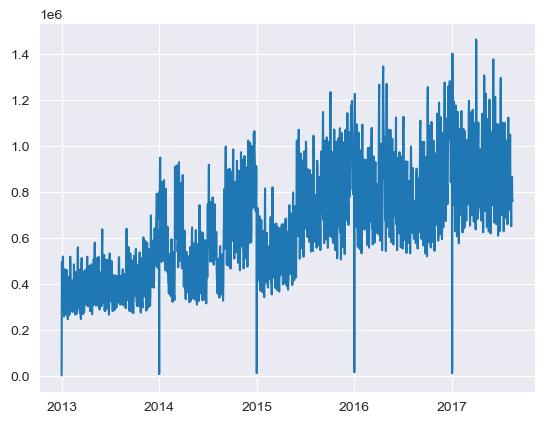

In [13]:
sales_over_time = train.groupby('date')['sales'].sum()
plt.plot(sales_over_time)
plt.show()

### Sales by day

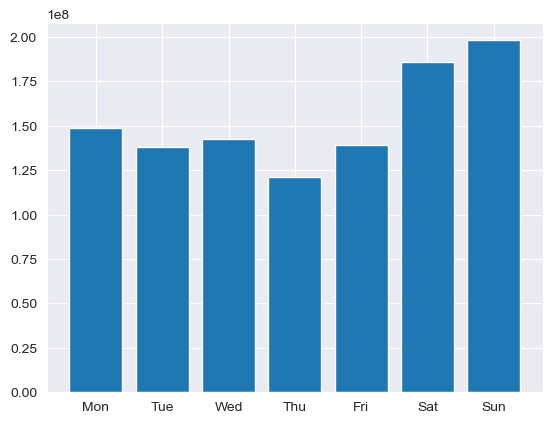

In [14]:
train["day"] = train["date"].dt.dayofweek
daily_sales = train.groupby("day")["sales"].sum()
plt.bar(daily_sales.index, daily_sales.values)
plt.xticks(range(7), ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

### Sales distribution by product family

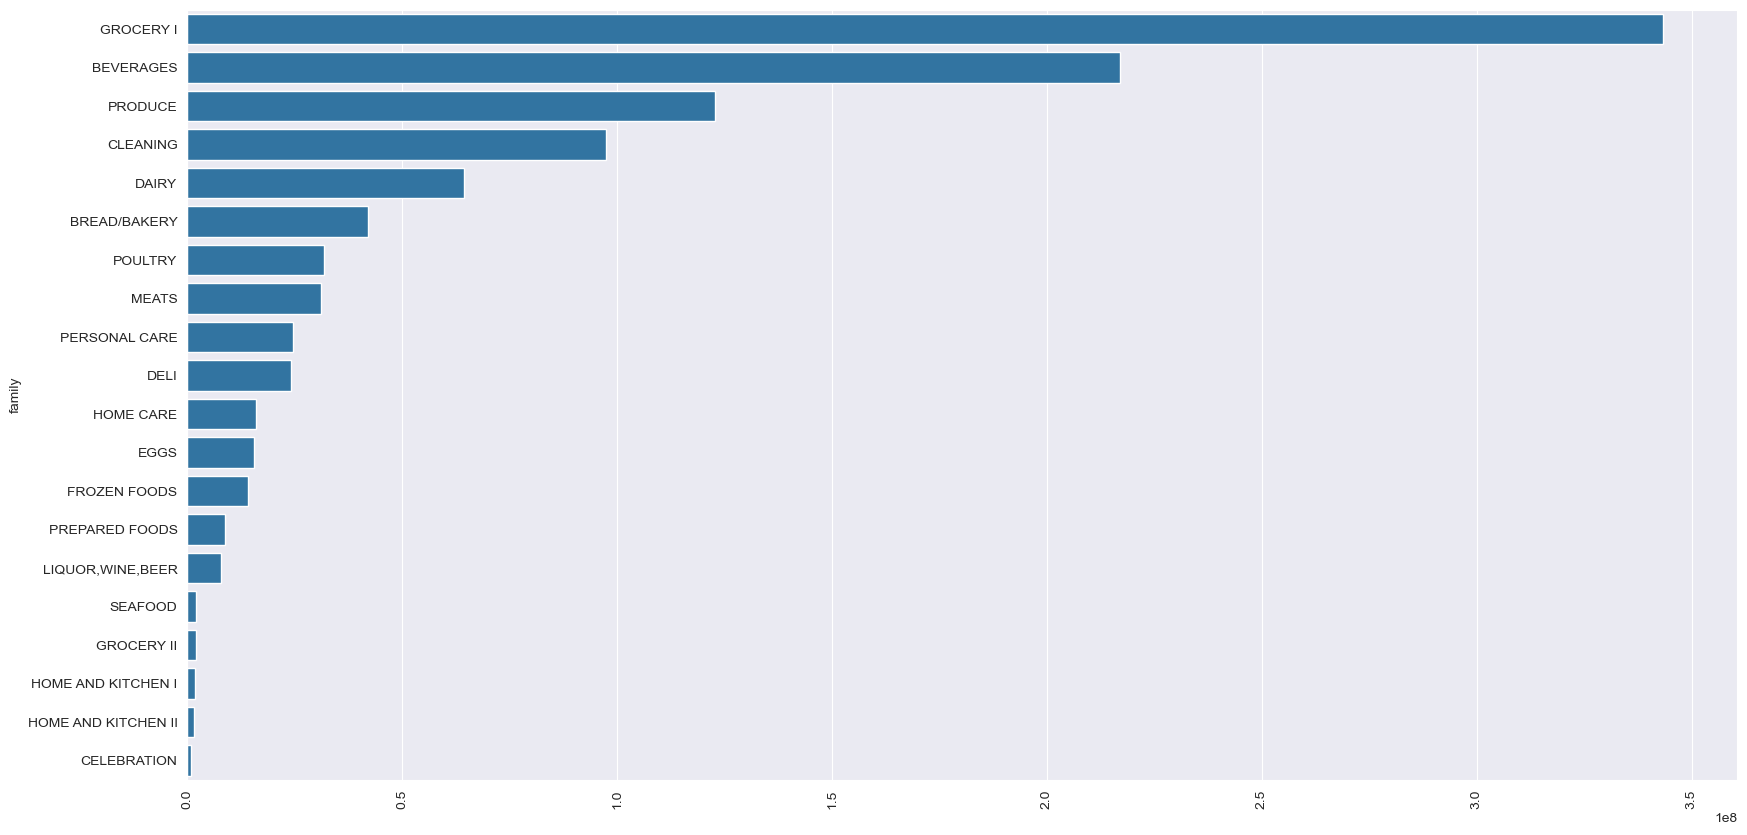

In [15]:
top_families = train.groupby("family")["sales"].sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(20, 10))
sns.barplot(y=top_families.index, x=top_families.values)
plt.xticks(rotation=90)
plt.show()

## Merge holiday data with train data

In [16]:
train_df = pd.merge(train, holidays, how="left", on="date")

### Analyze sales impact by holiday type

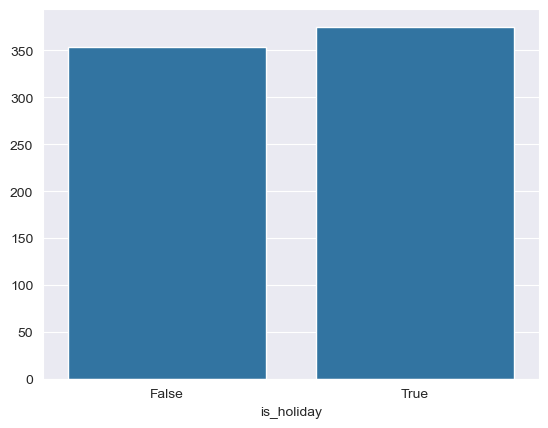

In [17]:
train_df["is_holiday"] = train["date"].isin(holidays["date"])
holiday_sales = train_df.groupby("is_holiday")["sales"].mean()
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.show()

### Analyze sales impact by holiday type

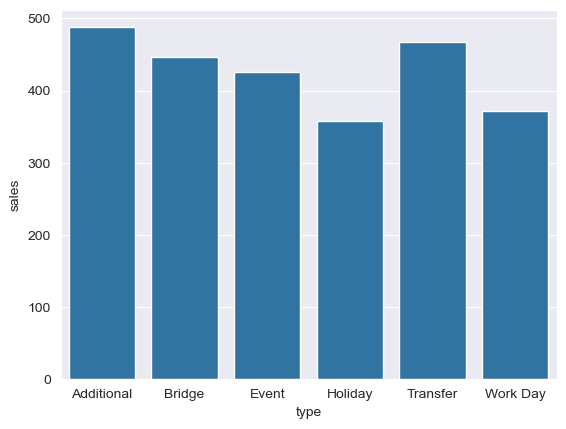

In [18]:
holiday_type_sales = train_df.groupby("type")["sales"].mean()
sns.barplot(holiday_type_sales)
plt.show()

### Merge oil data with sales

In [19]:
train_df = pd.merge(train_df, oil, how="left", on="date")
train_df

,id,date,store_nbr,family,sales,onpromotion,day,type,locale,locale_name,description,transferred,is_holiday,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14
1,1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14
2,2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14
4,4,2013-01-01,1,BOOKS,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57


### Oil prices over time

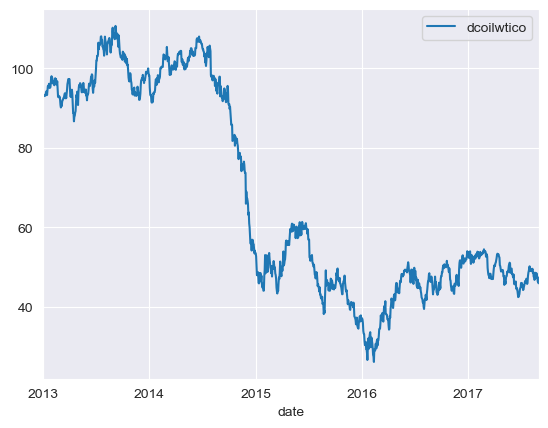

In [20]:
oil.plot(x="date", y="dcoilwtico")
plt.show()

### Merge stores data with sales data

In [21]:
train_df = pd.merge(train_df, stores, how="left", on="store_nbr")
train_df

,id,date,store_nbr,family,sales,onpromotion,day,type_x,locale,locale_name,description,transferred,is_holiday,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6


### Analyze sales impact by store type

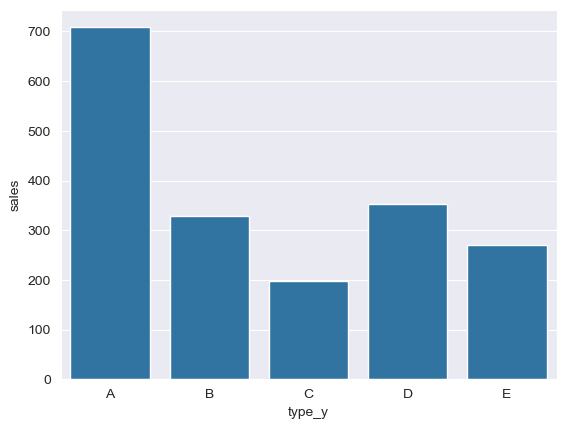

In [22]:
sales_type = train_df.groupby("type_y")["sales"].mean()
sns.barplot(sales_type)
plt.show()

### Top 7 Cities with highest average sales

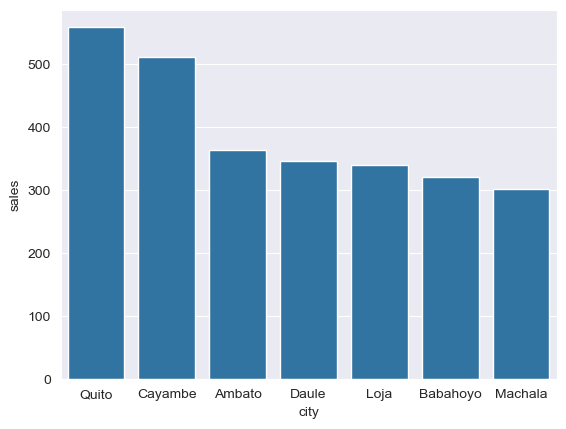

In [23]:
top_cities = train_df.groupby("city")["sales"].mean().nlargest(7)
sns.barplot(top_cities)
plt.show()

### Number of stores in top 7 city

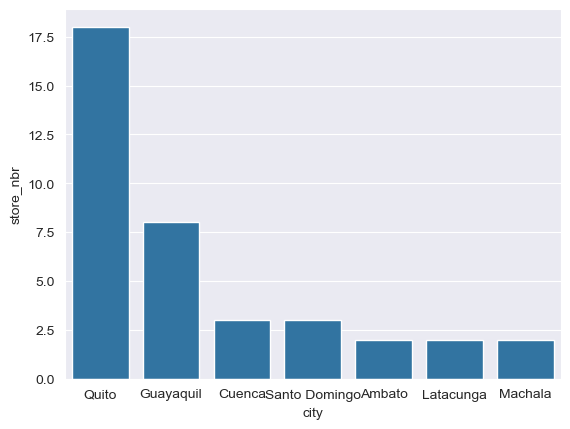

In [24]:
top_cities = train_df.groupby("city")["store_nbr"].nunique().nlargest(7)
sns.barplot(top_cities)
plt.show()

### Analyze family sales impact by city

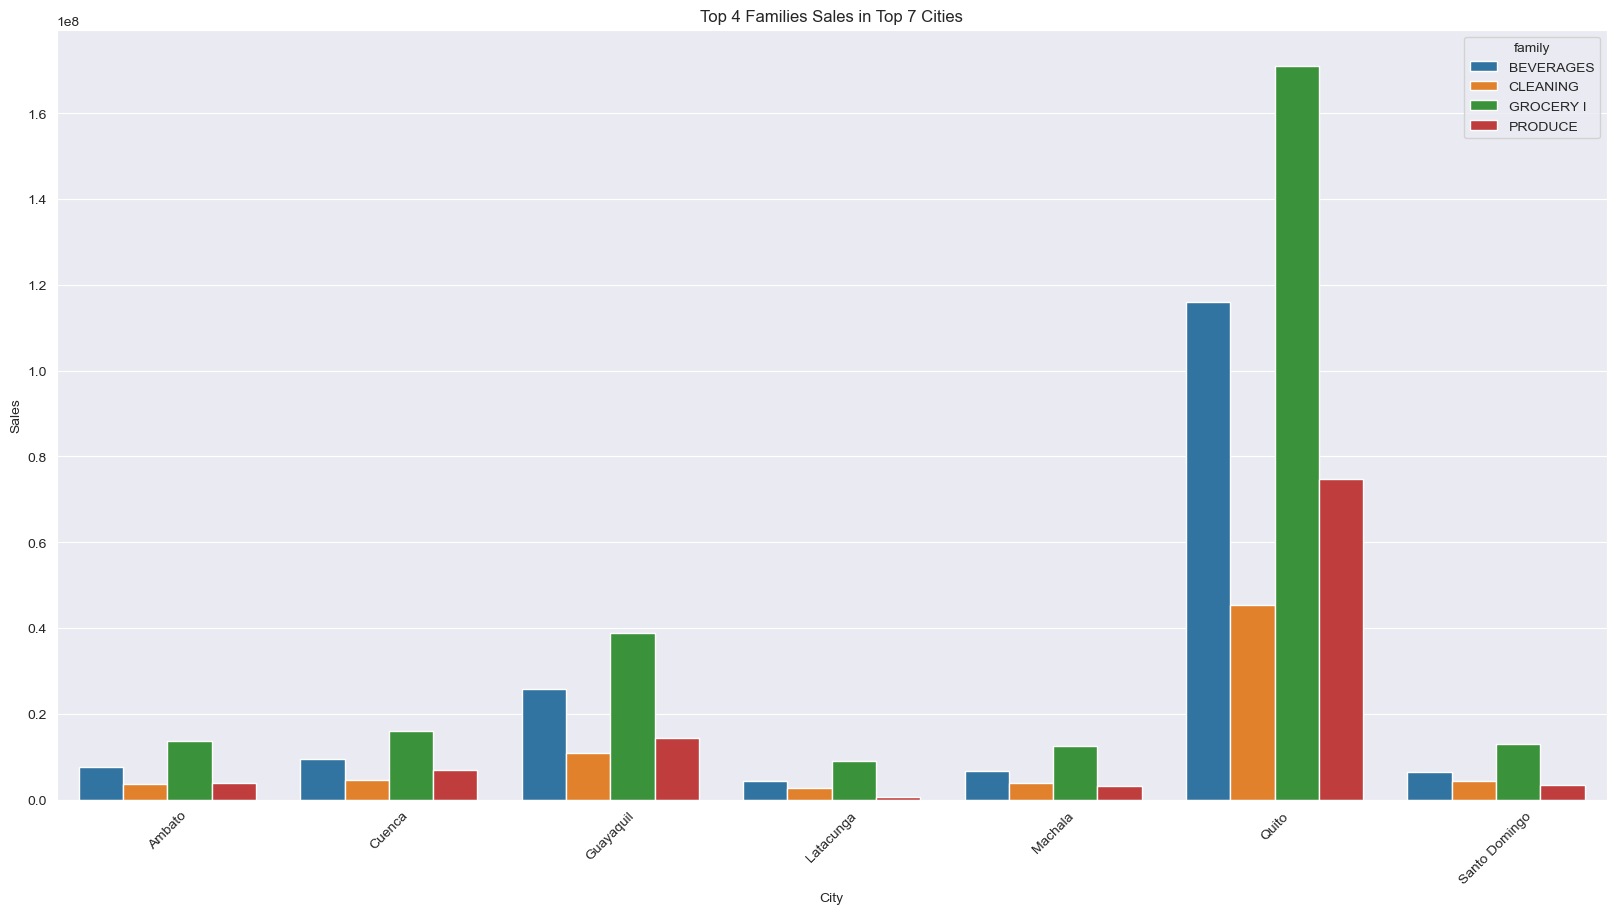

In [25]:
top_4_families = top_families[:4]
filtered_data = train_df[
    (train_df["city"].isin(top_cities.index)) &
    (train_df["family"].isin(top_4_families.index))
    ]

families_sales_in_city = filtered_data.groupby(["city", "family"])["sales"].sum().unstack()

families_sales_in_city = families_sales_in_city.stack().reset_index(name='sales')

plt.figure(figsize=(20, 10))
sns.barplot(x="city", y="sales", hue="family", data=families_sales_in_city)
plt.title("Top 4 Families Sales in Top 7 Cities")
plt.xlabel("City")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

### Top 5 City that sales oil prices

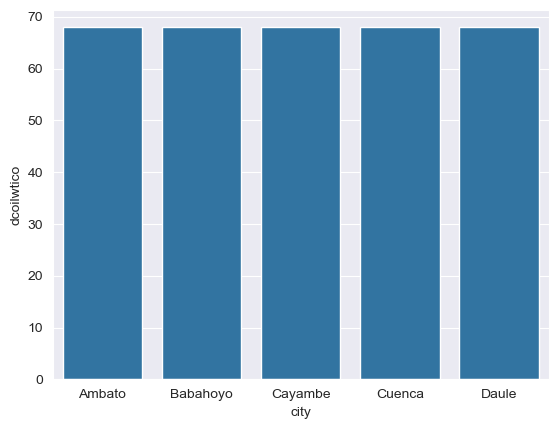

In [26]:
oil_prices = train_df.groupby("city")["dcoilwtico"].mean().nlargest(5)
sns.barplot(oil_prices)
plt.show()

# Prepare full-data merged for modeling

In [27]:
train_df

,id,date,store_nbr,family,sales,onpromotion,day,type_x,locale,locale_name,description,transferred,is_holiday,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,1,Holiday,National,Ecuador,Primer dia del ano,False,True,93.14,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False,NaN,47.57,Quito,Pichincha,B,6


## Handle missing values

In [28]:
train_df.isna().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
day                  0
type_x         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
is_holiday       53460
dcoilwtico      878526
city                 0
state                0
type_y               0
cluster              0
dtype: int64

In [29]:
train.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
day            0
dtype: int64

In [30]:
test.isna().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [31]:
train_df["dcoilwtico"].fillna(method="ffill", inplace=True)
train_df["dcoilwtico"].fillna(method="bfill", inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\3486945156.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["dcoilwtico"].fillna(method="ffill", inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\3486945156.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df["dcoilwtico"].fillna(method="ffill", inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\3486945156.py:2: Future

In [32]:
train_df["is_holiday"].fillna(train_df["is_holiday"].mode()[0], inplace=True)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\4001582840.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["is_holiday"].fillna(train_df["is_holiday"].mode()[0], inplace=True)
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\4001582840.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', T

In [33]:
train_df["type_x"] = train_df.apply(lambda row: "Holiday" if row["is_holiday"] else "Work Day", axis=1)

In [34]:
train_df.drop(columns=["locale_name", "description", "transferred", "locale", "state"], inplace=True)

## Check for duplicates

In [35]:
train_df.duplicated().sum()

53459

In [36]:
train_df.drop_duplicates(inplace=True)

In [37]:
train.duplicated().sum()

0

In [38]:
test.duplicated().sum()

0

## Handle Outliers

In [39]:
train_df["sales"] = np.log1p(train_df["sales"])
train_df["dcoilwtico"] = np.log1p(train_df["dcoilwtico"])

In [40]:
train["sales"] = np.log1p(train["sales"])

## Feature Engineering

#### Time based features

In [41]:
train_df["year"] = train_df["date"].dt.year
train_df["month"] = train_df["date"].dt.month
train_df["day"] = train_df["date"].dt.day
train_df["weekday"] = train_df["date"].dt.weekday
train_df["is_weekend"] = train_df["weekday"].isin([5, 6]).astype(int)

In [42]:
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day
train["weekday"] = train["date"].dt.weekday
train["is_weekend"] = train["weekday"].isin([5, 6]).astype(int)

In [43]:
test["year"] = test["date"].dt.year
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day
test["weekday"] = test["date"].dt.weekday
test["is_weekend"] = test["weekday"].isin([5, 6]).astype(int)

In [44]:
train

,id,date,store_nbr,family,sales,onpromotion,day,year,month,weekday,is_weekend
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0,1,2013,1,1,0
1,1,2013-01-01,1,BABY CARE,0.000000,0,1,2013,1,1,0
2,2,2013-01-01,1,BEAUTY,0.000000,0,1,2013,1,1,0
3,3,2013-01-01,1,BEVERAGES,0.000000,0,1,2013,1,1,0
4,4,2013-01-01,1,BOOKS,0.000000,0,1,2013,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,6.084802,0,15,2017,8,1,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,5.046987,1,15,2017,8,1,0
3000885,3000885,2017-08-15,9,PRODUCE,7.791824,148,15,2017,8,1,0
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,4.804021,8,15,2017,8,1,0


In [45]:

feature_cols = [col for col in train.columns if col != 'sales']
# Reorder test set columns to match training set columns
test = test[feature_cols]


In [46]:
test

,id,date,store_nbr,family,onpromotion,day,year,month,weekday,is_weekend
0,3000888,2017-08-16,1,AUTOMOTIVE,0,16,2017,8,2,0
1,3000889,2017-08-16,1,BABY CARE,0,16,2017,8,2,0
2,3000890,2017-08-16,1,BEAUTY,2,16,2017,8,2,0
3,3000891,2017-08-16,1,BEVERAGES,20,16,2017,8,2,0
4,3000892,2017-08-16,1,BOOKS,0,16,2017,8,2,0
...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,31,2017,8,3,0
28508,3029396,2017-08-31,9,PREPARED FOODS,0,31,2017,8,3,0
28509,3029397,2017-08-31,9,PRODUCE,1,31,2017,8,3,0
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,31,2017,8,3,0


#### Create lag features for analysis

In [47]:
train_df = train_df.sort_values(by=["store_nbr", "family", "date"])

# Previous day sales
train_df["sales_lag_1"] = train_df.groupby(["store_nbr", "family"])["sales"].shift(1)
train_df["sales_lag_1"] = train_df["sales_lag_1"].fillna(method="ffill").fillna(method="bfill")

# Previous week sales (7-day lag)
train_df["sales_lag_7"] = train_df.groupby(["store_nbr", "family"])["sales"].shift(7)
train_df["sales_lag_7"] = train_df["sales_lag_7"].fillna(method="ffill").fillna(method="bfill")

# Rolling mean (weekly average sales)
train_df["sales_rolling_mean_7"] = train_df.groupby(["store_nbr", "family"])["sales"].shift(1).rolling(window=7).mean()
train_df["sales_rolling_mean_7"] = train_df["sales_rolling_mean_7"].fillna(method="ffill").fillna(method="bfill")

# Oil price change (day-over-day percentage change)
train_df["oil_price_change"] = train_df["dcoilwtico"].pct_change().fillna(0)


C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\1799864197.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df["sales_lag_1"] = train_df["sales_lag_1"].fillna(method="ffill").fillna(method="bfill")
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\1799864197.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df["sales_lag_7"] = train_df["sales_lag_7"].fillna(method="ffill").fillna(method="bfill")
C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\1799864197.py:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df["sales_rolling_mean_7"] = train_df["sales_rolling_mean_7"].fillna(method="ffill").fillna(method="bfill")


### Dimensionality reduction

In [48]:
train_df["city"].value_counts()

city
Quito            1000297
Guayaquil         444576
Cuenca            166716
Santo Domingo     166716
Manta             111144
Latacunga         111144
Machala           111144
Ambato            111144
Quevedo            55572
Esmeraldas         55572
Loja               55572
Libertad           55572
Playas             55572
Daule              55572
Babahoyo           55572
Salinas            55572
Puyo               55572
Guaranda           55572
Ibarra             55572
Riobamba           55572
Cayambe            55572
El Carmen          55572
Name: count, dtype: int64

In [49]:
top_cities = ["Quito", "Guayaquil", "Cuenca", "Manta", "Santo Domingo", "latacunga", "Machala"]
train_df["city"] = train_df["city"].apply(lambda x: "Other" if x not in top_cities else x)

In [50]:
train_df["family"].value_counts()

family
HOME AND KITCHEN II           90937
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
AUTOMOTIVE                    90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION          

In [51]:
family_mapping = {
    'HOME AND KITCHEN II': 'Home & Kitchen',
    'HOME APPLIANCES': 'Home & Kitchen',
    'SCHOOL AND OFFICE SUPPLIES': 'Office Supplies',
    'PRODUCE': 'Groceries',
    'PREPARED FOODS': 'Groceries',
    'POULTRY': 'Groceries',
    'PLAYERS AND ELECTRONICS': 'Electronics',
    'PET SUPPLIES': 'Pets',
    'PERSONAL CARE': 'Beauty & Personal Care',
    'MEATS': 'Groceries',
    'MAGAZINES': 'Books & Media',
    'LIQUOR,WINE,BEER': 'Beverages',
    'LINGERIE': 'Clothing',
    'LAWN AND GARDEN': 'Home & Garden',
    'LADIESWEAR': 'Clothing',
    'HOME CARE': 'Home & Kitchen',
    'AUTOMOTIVE': 'Automotive',
    'BABY CARE': 'Baby Products',
    'HOME AND KITCHEN I': 'Home & Kitchen',
    'HARDWARE': 'Home & Garden',
    'GROCERY II': 'Groceries',
    'GROCERY I': 'Groceries',
    'FROZEN FOODS': 'Groceries',
    'EGGS': 'Groceries',
    'DELI': 'Groceries',
    'DAIRY': 'Groceries',
    'CLEANING': 'Home & Kitchen',
    'CELEBRATION': 'Occasions & Gifts',
    'BREAD/BAKERY': 'Groceries',
    'BOOKS': 'Books & Media',
    'BEVERAGES': 'Beverages',
    'BEAUTY': 'Beauty & Personal Care',
    'SEAFOOD': 'Groceries'
}

train_df['family_grouped'] = train_df['family'].map(family_mapping)

train_df['family_grouped'].value_counts()


family_grouped
Groceries                 1091232
Home & Kitchen             454681
Beauty & Personal Care     181872
Beverages                  181872
Books & Media              181872
Home & Garden              181872
Clothing                   181872
Automotive                  90936
Baby Products               90936
Occasions & Gifts           90936
Pets                        90936
Electronics                 90936
Office Supplies             90936
Name: count, dtype: int64

In [52]:
train["family_grouped"] = train["family"].map(family_mapping)

In [53]:
test["family_grouped"] = test["family"].map(family_mapping)

C:\Users\faresaboagour\AppData\Local\Temp\ipykernel_18612\3572469770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["family_grouped"] = test["family"].map(family_mapping)


## Handle Categorical Features

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_df["type_x"] = le.fit_transform(train_df["type_x"])
train_df["type_y"] = le.fit_transform(train_df["type_y"])

train_df = pd.get_dummies(train_df, columns=["family", "city"], drop_first=True)

In [55]:
train = pd.get_dummies(train, columns=["family_grouped"], drop_first=True)

In [56]:
test = pd.get_dummies(test, columns=["family_grouped"], drop_first=True)

In [60]:
col_to_drop = ["id", "date", "family"]
train_df.drop(columns=col_to_drop, inplace=True)

KeyError: "['id', 'date', 'family'] not found in axis"

In [61]:
train

,id,date,store_nbr,family,sales,onpromotion,day,year,month,weekday,...,family_grouped_Beverages,family_grouped_Books & Media,family_grouped_Clothing,family_grouped_Electronics,family_grouped_Groceries,family_grouped_Home & Garden,family_grouped_Home & Kitchen,family_grouped_Occasions & Gifts,family_grouped_Office Supplies,family_grouped_Pets
0,0,2013-01-01,1,AUTOMOTIVE,0.000000,0,1,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
1,1,2013-01-01,1,BABY CARE,0.000000,0,1,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
2,2,2013-01-01,1,BEAUTY,0.000000,0,1,2013,1,1,...,False,False,False,False,False,False,False,False,False,False
3,3,2013-01-01,1,BEVERAGES,0.000000,0,1,2013,1,1,...,True,False,False,False,False,False,False,False,False,False
4,4,2013-01-01,1,BOOKS,0.000000,0,1,2013,1,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,6.084802,0,15,2017,8,1,...,False,False,False,False,True,False,False,False,False,False
3000884,3000884,2017-08-15,9,PREPARED FOODS,5.046987,1,15,2017,8,1,...,False,False,False,False,True,False,False,False,False,False
3000885,3000885,2017-08-15,9,PRODUCE,7.791824,148,15,2017,8,1,...,False,False,False,False,True,False,False,False,False,False
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,4.804021,8,15,2017,8,1,...,False,False,False,False,False,False,False,False,True,False


In [62]:
train.drop(columns=col_to_drop, inplace=True)

In [63]:
test.drop(columns=col_to_drop, inplace=True)

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000889 entries, 0 to 3054215
Data columns (total 55 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   store_nbr                          int64  
 1   sales                              float64
 2   onpromotion                        int64  
 3   day                                int32  
 4   type_x                             int32  
 5   is_holiday                         bool   
 6   dcoilwtico                         float64
 7   type_y                             int32  
 8   cluster                            int64  
 9   year                               int32  
 10  month                              int32  
 11  weekday                            int32  
 12  is_weekend                         int32  
 13  sales_lag_1                        float64
 14  sales_lag_7                        float64
 15  sales_rolling_mean_7               float64
 16  oil_price_change       

## Split data into train and validation sets

In [65]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["sales"], axis=1)
y = train["sales"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

In [66]:
from sklearn.ensemble import RandomForestRegressor

# from sklearn.model_selection import RandomizedSearchCV
# 
# params = {
#     "n_estimators": np.arange(50, 150, 50),  # Smaller number of trees
#     "max_depth": [5, 10],  # Smaller depth values
#     "min_samples_split": [2, 4]  # Fewer options
# }
# rf = RandomForestRegressor()
# 
# random_search = RandomizedSearchCV(rf, params, n_iter=3, cv=None, verbose=2, n_jobs=-1)
# 
# 
# random_search.fit(X_train_pca, y_train)


rf = RandomForestRegressor(n_estimators=50, max_depth=4, min_samples_split=4, n_jobs=-1, verbose=2)
rf.fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.4s


building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomForestRegressor(max_depth=4, min_samples_split=4, n_estimators=50,
                      n_jobs=-1, verbose=2)

## Evaluate model

In [67]:
y_pred = rf.predict(X_val)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.1s finished


In [68]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

RMSE: 1.778238208461306
R2: 0.5651418419049867


## Prediction model

In [69]:
y_pred = rf.predict(test)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  50 out of  50 | elapsed:    0.0s finished


## Save model prediction to submission file

In [70]:
submission = pd.read_csv("sample_submission.csv")
submission["sales"] = y_pred
submission.to_csv("submission.csv", index=False)

# Use XGboost 

In [74]:
from xgboost import XGBRFRegressor

xgb = XGBRFRegressor(n_estimators=550, max_depth=8, min_child_weight=6, n_jobs=-1, verbose=2)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
mse = mean_squared_error(y_pred, y_val)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")

C:\Users\faresaboagour\AppData\Local\anaconda3\envs\MachineLearning\Lib\site-packages\xgboost\core.py:158: UserWarning: [05:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


RMSE: 1.6054197968581083
R2: 0.645558166035924


In [75]:
y_pred = xgb.predict(test)

In [76]:
submission = pd.read_csv("sample_submission.csv")
submission["sales"] = y_pred
submission.to_csv("submission.csv", index=False)